# High Precision Low Q<sup>2</sup> Asymmetry Data

Compilation of asymmetry data and recent global fit function.

In [1]:
# *q2       = four momentum transfer
# *ffration = form factor ratios
# *effratio = statistical uncertainty

# Data from Zhan et al., PLB 705 (2011) 59.
zq2       = [ 0.298, 0.346, 0.402, 0.449, 0.494, 0.547, 0.599, 0.695 ]
zffratio  = [ 0.927, 0.943, 0.932, 0.931, 0.929, 0.927, 0.908, 0.912 ]
zeffratio = [ 0.011, 0.009, 0.007, 0.006, 0.005, 0.006, 0.005, 0.005 ]

# Data from Paolone et al., PRL 105 (2010) 072001.
pq2       = [ 0.800, 1.300 ]
pffratio  = [ 0.901, 0.858 ]
peffratio = [ 0.007, 0.008 ]

# Data from C. Crawford et al., PRL 98 (2007) 052301. 
cq2       = [ 0.162,0.191,0.232,0.282,0.345,0.419,0.500,0.591]
cffratio  = [ 1.019,1.006,0.999,0.973,0.973,0.980,0.993,0.961]
ceffratio = [ 0.013,0.012,0.012,0.012,0.014,0.016,0.019,0.025]

# Data from V. Punjabi et al., PRC 71 (2005) 055202.
vq2       = [ 0.49,  0.79, 1.18, 1.48, 1.77, 1.88 ]
vffratio  = [ 0.979, 0.951, 0.883, 0.798, 0.789, 0.777 ]
veffratio = [ 0.016, 0.012, 0.013, 0.029, 0.024, 0.024 ]

# Function from C. Carlson et al., PRC 93 (2016) 065207.
def carlfunc(q2):
    return (1-q2/8.02) # [GeV/c]**2 units

Make a plot of the data and fit function.

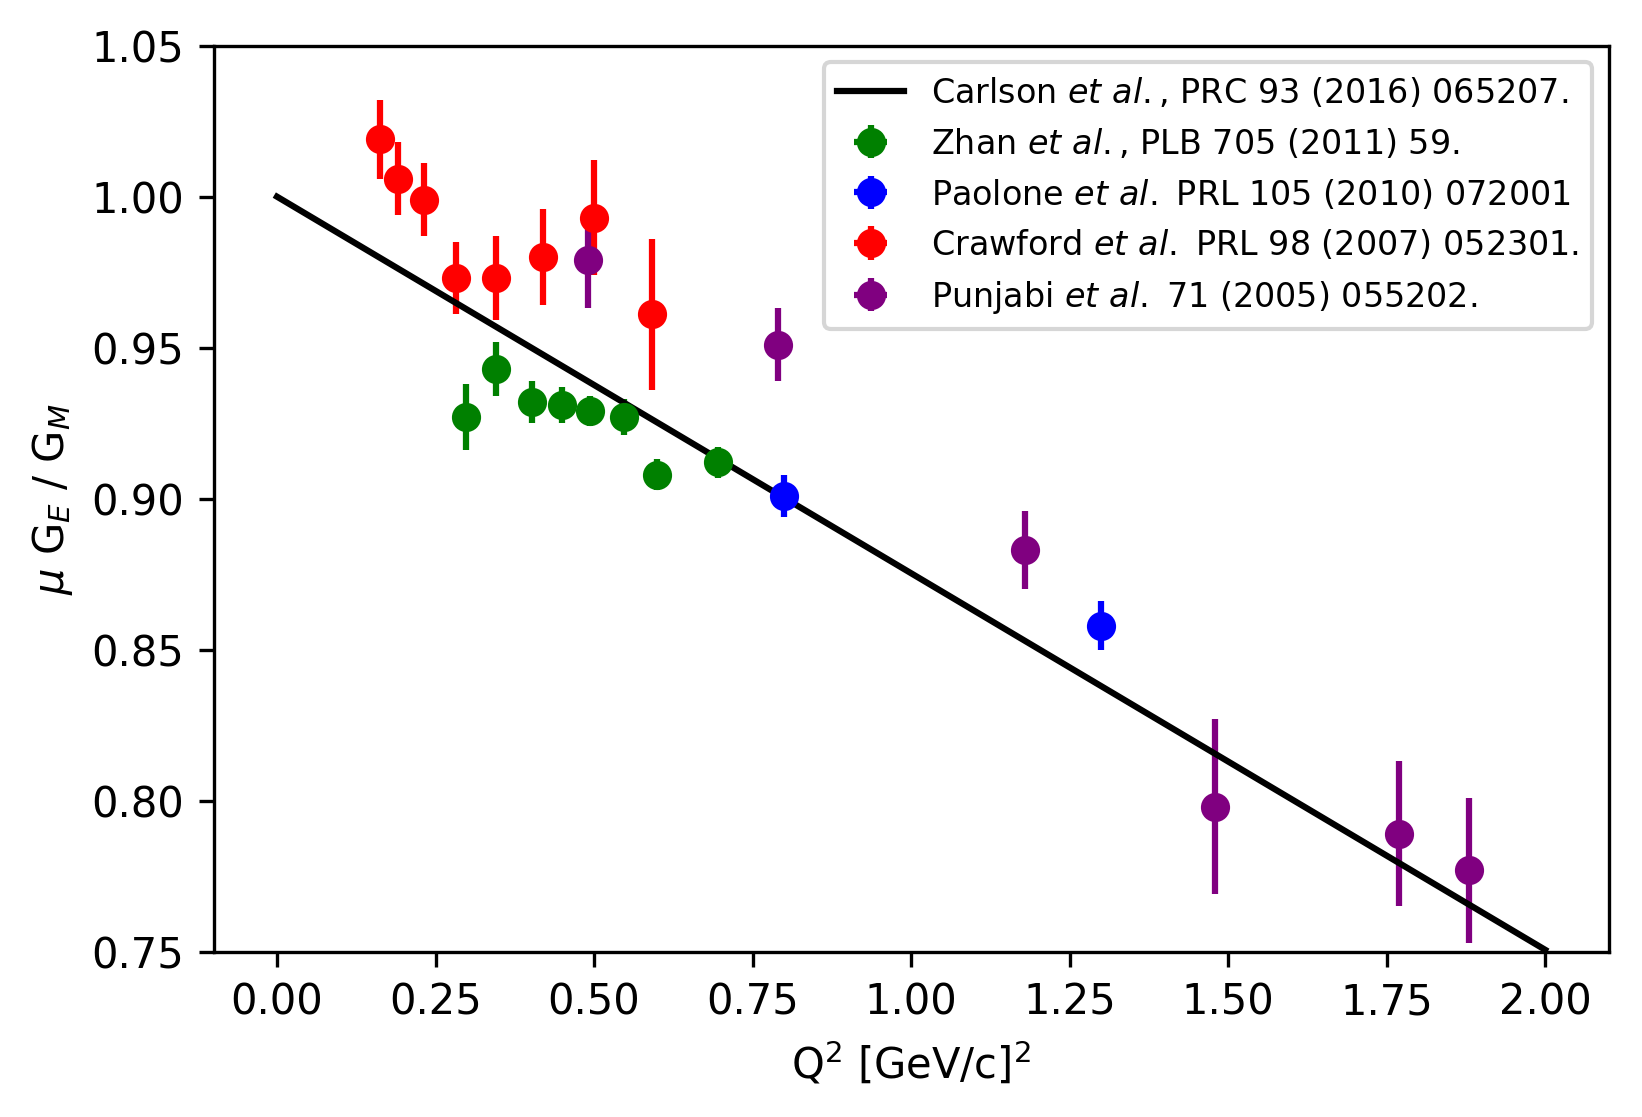

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def carlfunc(q2):
    return (1-q2/8.02)

#plt.xkcd()
plt.figure(dpi=300)
rq2=np.linspace(0,2.0,100)

plt.plot(rq2,carlfunc(rq2),'-', color='black', \
             label='Carlson $\it{et\ al.}$, PRC 93 (2016) 065207.') 

plt.errorbar(zq2,zffratio, xerr=0, yerr=zeffratio, fmt='o',color='green', \
             label='Zhan $\it{et\ al.}$, PLB 705 (2011) 59.')

plt.errorbar(pq2,pffratio, xerr=0, yerr=peffratio, fmt='o', color='blue', \
             label='Paolone $\it{et\ al.}$ PRL 105 (2010) 072001')

plt.errorbar(cq2,cffratio, xerr=0, yerr=ceffratio, fmt='o', color='red', \
             label='Crawford $\it{et\ al.}$ PRL 98 (2007) 052301.')

plt.errorbar(vq2,vffratio, xerr=0, yerr=veffratio, fmt='o', color='purple', \
             label='Punjabi $\it{et\ al.}$ 71 (2005) 055202.')

plt.ylabel('$\mu$ G$_E$ / G$_M$')
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylim(0.75,1.05)
plt.rc('legend', fontsize=8)  
plt.legend()
plt.savefig("./Figures/AsymFigure.png") # Raster Graphic
plt.savefig("./Figures/AsymFigure.pdf") # Vector Graphic
plt.show()
